In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import ompy as om
import copy
from matplotlib.colors import LogNorm

from uncertainties import unumpy

Testing how the unumpy module works by looking at its behaviour on my spectra

In [2]:
firstgen = om.Matrix(filename="error_propagation_ensemble/firstgen-orig.m")
firstgen_std = om.Matrix(filename="error_propagation_ensemble/firstgen_std.m")

In [3]:
u_firstgen = unumpy.uarray(firstgen.values, firstgen_std.values)

<IPython.core.display.Javascript object>


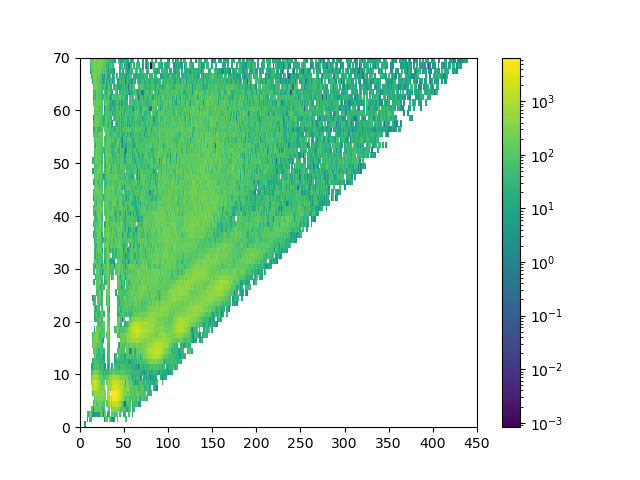

In [4]:
f, ax = plt.subplots(1,1)
cbar = ax.pcolormesh(unumpy.nominal_values(u_firstgen), norm=LogNorm())
f.colorbar(cbar, ax=ax)
plt.show()

<IPython.core.display.Javascript object>


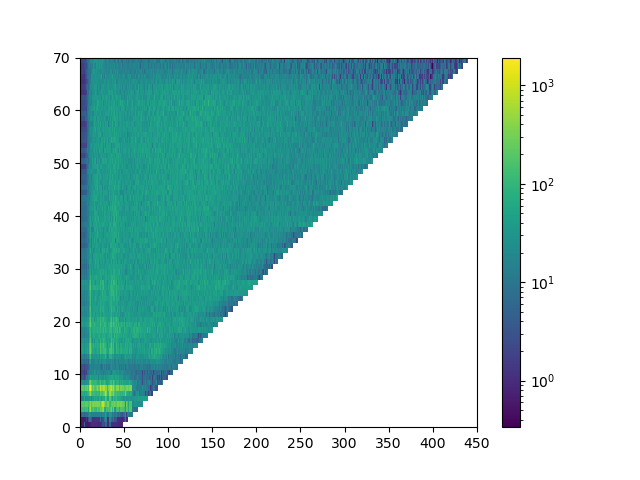

In [5]:
f, ax = plt.subplots(1,1)
cbar = ax.pcolormesh(unumpy.std_devs(u_firstgen), norm=LogNorm())
f.colorbar(cbar, ax=ax)
plt.show()

## Normalize each row

In [6]:
u_firstgen_norm = u_firstgen / np.sum(u_firstgen, axis=1)[:,None]

<IPython.core.display.Javascript object>


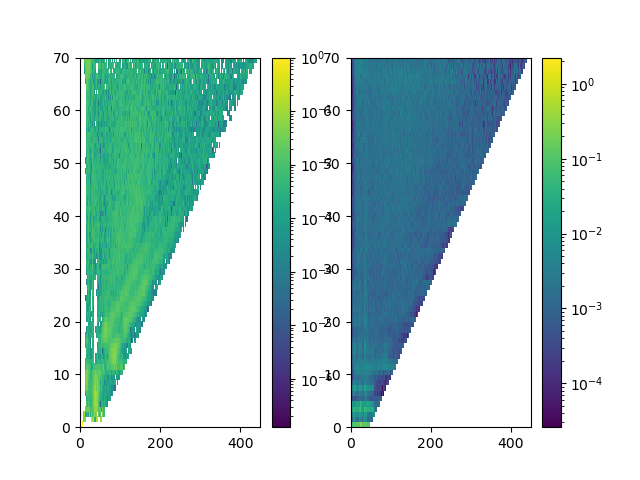

In [7]:
f, (ax1, ax2) = plt.subplots(1,2)
cbar1 = ax1.pcolormesh(unumpy.nominal_values(u_firstgen_norm), norm=LogNorm())
f.colorbar(cbar1, ax=ax1)
cbar2 = ax2.pcolormesh(unumpy.std_devs(u_firstgen_norm), norm=LogNorm())
f.colorbar(cbar2, ax=ax2)
plt.show()

<IPython.core.display.Javascript object>


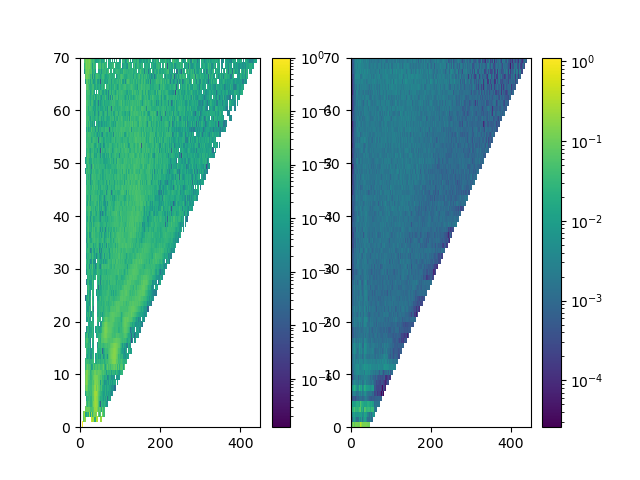

In [10]:
# Is it any different from simply dividing both counts and std by normalization?
# I.e., is there some probability-theory that I'm not considering in the std normalization?

firstgen_norm = firstgen.values/np.sum(firstgen.values, axis=1)[:,None]
firstgen_std_norm = om.div0(firstgen_std.values, np.sum(firstgen.values, axis=1)[:,None]) # Still divide by firstgen.matrix

f, (ax1, ax2) = plt.subplots(1,2)
cbar1 = ax1.pcolormesh(firstgen_norm, norm=LogNorm())
f.colorbar(cbar1, ax=ax1)
cbar2 = ax2.pcolormesh(firstgen_std_norm, norm=LogNorm())
f.colorbar(cbar2, ax=ax2)
plt.show()